In [ ]:
import tensorflow as tf

### 2.5.1 A Simple Fuction

In [22]:
x = tf.Variable(tf.range(100, dtype = tf.float32))
x

<tf.Variable 'Variable:0' shape=(100,) dtype=float32, numpy=
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.], dtype=float32)>

In [ ]:
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes= 1)
y

In [ ]:
x_grad = t.gradient(y,x)
x_grad

In [ ]:
x_grad == 4 * x

In [ ]:
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)
t.gradient(y,x)

### 2.5.2 Backward for Non-Scalar Variables

In [ ]:
with tf.GradientTape() as t:
    y = x * x
t.gradient(y,x)

### 2.5.3 Detaching Computation

In [14]:
# Set persistent = True to preserve the compute graph.
# This lets us run t.gradient more than once

with tf.GradientTape(persistent=True) as t:
    y = x * x
    u = tf.stop_gradient(y)
    z = u * x
    
x_grad = t.gradient(z,x)
x_grad == u, x_grad

(<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>)

In [15]:
t.gradient(y, x) == 2 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [ ]:
with tf.GradientTape() as t:
    z = x * x * x
x_grad2 = t.gradient(z,x)
x_grad2 == u, x_grad2

### 2.5.4 Gradients and Python control Flow

In [16]:
def f(a):
    b = a * 2
    while tf.norm(b) < 1000:
        b  = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

In [17]:
a = tf.Variable(tf.random.normal(shape=()))
with tf.GradientTape() as t:
    d = f(a)
d_grad = t.gradient(d,a)
d_grad

<tf.Tensor: shape=(), dtype=float32, numpy=65536.0>

In [19]:
d_grad == d / a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [23]:
with tf.GradientTape() as t:
    y = tf.cos(x)
y

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 1.        ,  0.5403023 , -0.4161468 , -0.9899925 , -0.6536436 ,
        0.28366217,  0.96017027,  0.75390226, -0.14550003, -0.91113025,
       -0.8390715 ,  0.0044257 ,  0.84385395,  0.9074468 ,  0.13673723,
       -0.7596879 , -0.9576595 , -0.27516335,  0.6603167 ,  0.9887046 ,
        0.40808207, -0.54772925, -0.99996084, -0.53283304,  0.42417902,
        0.99120283,  0.64691937, -0.29213881, -0.96260583, -0.74805754,
        0.15425146,  0.91474235,  0.8342234 , -0.01327675, -0.8485703 ,
       -0.9036922 , -0.12796369,  0.76541406,  0.95507365,  0.26664293,
       -0.66693807, -0.98733926, -0.3999853 ,  0.5551133 ,  0.9998433 ,
        0.525322  , -0.43217793, -0.9923355 , -0.64014435,  0.30059254,
        0.96496606,  0.74215424, -0.16299078, -0.9182828 , -0.8293098 ,
        0.02212675,  0.8532201 ,  0.8998668 ,  0.11918014, -0.7710802 ,
       -0.95241296, -0.25810164,  0.67350715,  0.9858966 ,  0.39185724,
       -0.562453

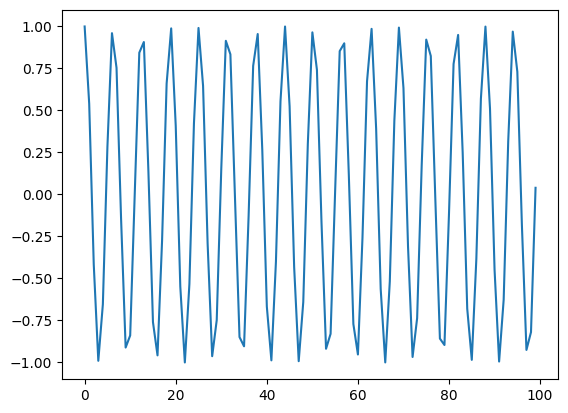

In [24]:
import matplotlib.pyplot as plt

plt.plot(x,y)

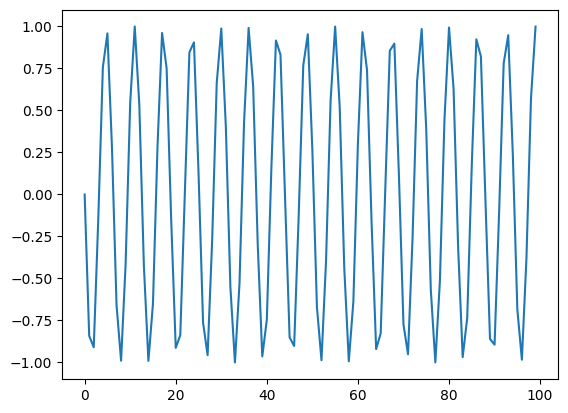

In [25]:
x_grad = t.gradient(y,x)

plt.plot(x,x_grad)